# DQN (Deep Q-Network)

#### Autorzy projektu:
* Piotr Kulczycki, 259257
* Sebastian Żółkiewicz, 259337
#### Zajęcia:
*    Algorytmy sztucznej inteligencji w Przemyśle 4.0
#### Grupa:
*    nr 1, poniedziałek, 13:15 - 15:00
#### Prowadzący:
*    Dr inż. Radosław Idzikowski


## Zrealizowane założenia projektu

* Krótki opis problemu
* Samodzielna implementacja Polityki (sieci neuronowej) w c++
* implementacja algorytmu DQN w 4 wariantach
* przeprwoadzenie testów porównawczech zaimplementowanych algorytmów

### Wstęp teoretyczny

**Deep Q-Network (DQN)** to algorytm uczenia maszynowego, który łączy klasyczną metodę Q-learning z głębokimi sieciami neuronowymi, aby rozwiązywać problemy decyzyjne w środowiskach o dużej przestrzeni stanów, jak gry komputerowe (np. Atari). Jest to metoda typu *reinforcement learning* (uczenie ze wzmocnieniem), która pozwala agentowi uczyć się strategii na podstawie doświadczeń zdobywanych podczas interakcji ze środowiskiem.

#### Podstawy algorytmu DQN

Algorytm DQN ma na celu znalezienie funkcji wartości Q (Q-value function), która określa oczekiwaną nagrodę (w przyszłości) związaną z podjęciem określonego działania w danym stanie. W klasycznym Q-learningu funkcja wartości Q jest reprezentowana w postaci tablicy, której rozmiar rośnie wykładniczo w zależności od liczby stanów i działań, co jest niewykonalne w przypadku dużych przestrzeni stanów.

DQN rozwiązuje ten problem poprzez zastąpienie tabeli Q funkcją aproksymującą – siecią neuronową. Sieć ta przyjmuje stan jako wejście i zwraca przewidywane wartości Q dla wszystkich możliwych działań w tym stanie.

Sam algorytm uczenia polega na 

#### Mechanizm pamięci (Replay Buffer)

Jednym z kluczowych komponentów algorytmu DQN jest **pamięć** (replay buffer), która przechowuje doświadczenia agenta w postaci krotek (stan, akcja, nagroda, nowy stan). W trakcie procesu uczenia agent gromadzi doświadczenia w tej pamięci i losowo je pobiera w celu zaktualizowania parametrów sieci neuronowej. Losowe próbkowanie doświadczeń pozwala na złamanie korelacji między kolejnymi próbkami, co poprawia stabilność procesu uczenia.

Bez tej techniki, dane z kolejnych kroków mogą być silnie powiązane i wprowadzać korelację, co utrudnia proces trenowania sieci neuronowej. **Replay buffer** zwiększa różnorodność danych i zapewnia, że agent uczy się na przykładach z różnych etapów procesu.

#### Mechanizm agenta docelowego (Target Network)

Innym istotnym elementem w DQN jest **mechanizm agenta docelowego**. Zamiast bezpośrednio aktualizować sieć neuronową w oparciu o bieżące wartości Q, DQN używa dwóch kopii sieci neuronowej:
1. **Główna sieć (Q-network)** - jest odpowiedzialna za aktualizację funkcji Q na podstawie doświadczeń, oraz zbieranie doświadczenia poprzez interakcję ze środowiskiem.
2. **Sieć docelowa (Target Network)** - jest kopią głównej sieci, ale jej wagi są aktualizowane rzadziej, co pomaga w stabilizacji procesu uczenia.

Mechanizm target-agenta pozwala na bardziej stabilne uczenie, ponieważ zmiany w funkcji wartości Q nie wpływają na siebie nawzajem w sposób natychmiastowy, co zmniejsza ryzyko niestabilności. Co pewien czas wagi sieci docelowej są kopiowane z głównej sieci, co daje lepszą konwergencję i poprawia wydajność algorytmu.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [4]:
def getMeanData(df,h,w):
    filterd_df = (df [(df ['h'] == h) & (df ['w'] == w)])
    mean = filterd_df.mean()
    min = filterd_df.min()
    max = filterd_df.max()
    return (min['time'],mean['time'],max['time']),(min['iterations'],mean['iterations'],max['iterations']) 


In [5]:
sizes = []
# full range of sizes
# for h in range(2,10):
#    for w in range(2,h+1):
#      sizes.append((h,w,h*w))

#dane dla stałej wielkości heigth
h_const = 9
for h in range(h_const,h_const+1):
   for w in range(2,h+1):
     sizes.append((h,w,h*w))


# for h in range(2,10):
#     sizes.append((h,h,h*h))


sizes = sorted(sizes, key=lambda x: x[2])

In [ ]:
df_simple = pd.read_csv("DQN.csv",header=0)
df_memory = pd.read_csv("DQN_memory.csv",header=0)
df_target = pd.read_csv("DQN_target.csv",header=0)
df_full =   pd.read_csv("DQN_memory_target.csv",header=0)

dataFrames = [("simple",df_simple),("memory",df_memory),("target",df_target),("full",df_full)]

dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

ready_data_sorted_by_size = {"simple":[],"memory":[],"target":[],"full":[]}

for df_name,df in dataFrames:
  for h,w,_ in sizes:
    ready_data_sorted_by_size[df_name].append((getMeanData(df,h,w),h*w))

print(ready_data_sorted_by_size["simple"])
print(ready_data_sorted_by_size["memory"])
print(ready_data_sorted_by_size["target"])
print(ready_data_sorted_by_size["full"])

[(((0.0149154, 3.4470530720000006, 13.1494), (85.0, 22538.48, 85131.0)), 18), (((0.0312564, 3.981462321999999, 16.7794), (192.0, 24820.18, 105007.0)), 27), (((0.187568, 5.219806, 10.5154), (1112.0, 31286.02, 63631.0)), 36), (((0.474076, 5.814409520000001, 13.0954), (2669.0, 32879.14, 74155.0)), 45), (((0.0563686, 7.459888552, 33.9748), (310.0, 39712.74, 175856.0)), 54), (((2.0506, 9.7584152, 52.6849), (10300.0, 50199.2, 271896.0)), 63), (((0.0303116, 9.885907812000001, 26.8812), (146.0, 49415.4, 134098.0)), 72), (((0.640018, 11.776422559999999, 69.0021), (3191.0, 56460.48, 333986.0)), 81)]
[(((0.0190672, 4.717083206, 13.8868), (117.0, 29786.78, 87820.0)), 18), (((0.0596665, 6.6047068200000005, 27.0833), (353.0, 39987.66, 164018.0)), 27), (((0.0567288, 8.937496516, 30.2652), (327.0, 51630.1, 175538.0)), 36), (((0.136563, 10.973376560000002, 43.0642), (737.0, 59394.8, 232872.0)), 45), (((0.287785, 14.15276444, 56.2608), (1486.0, 73178.04, 291111.0)), 54), (((0.261389, 11.06894438, 22.212

# Prezentacja danych na wykresie 2D

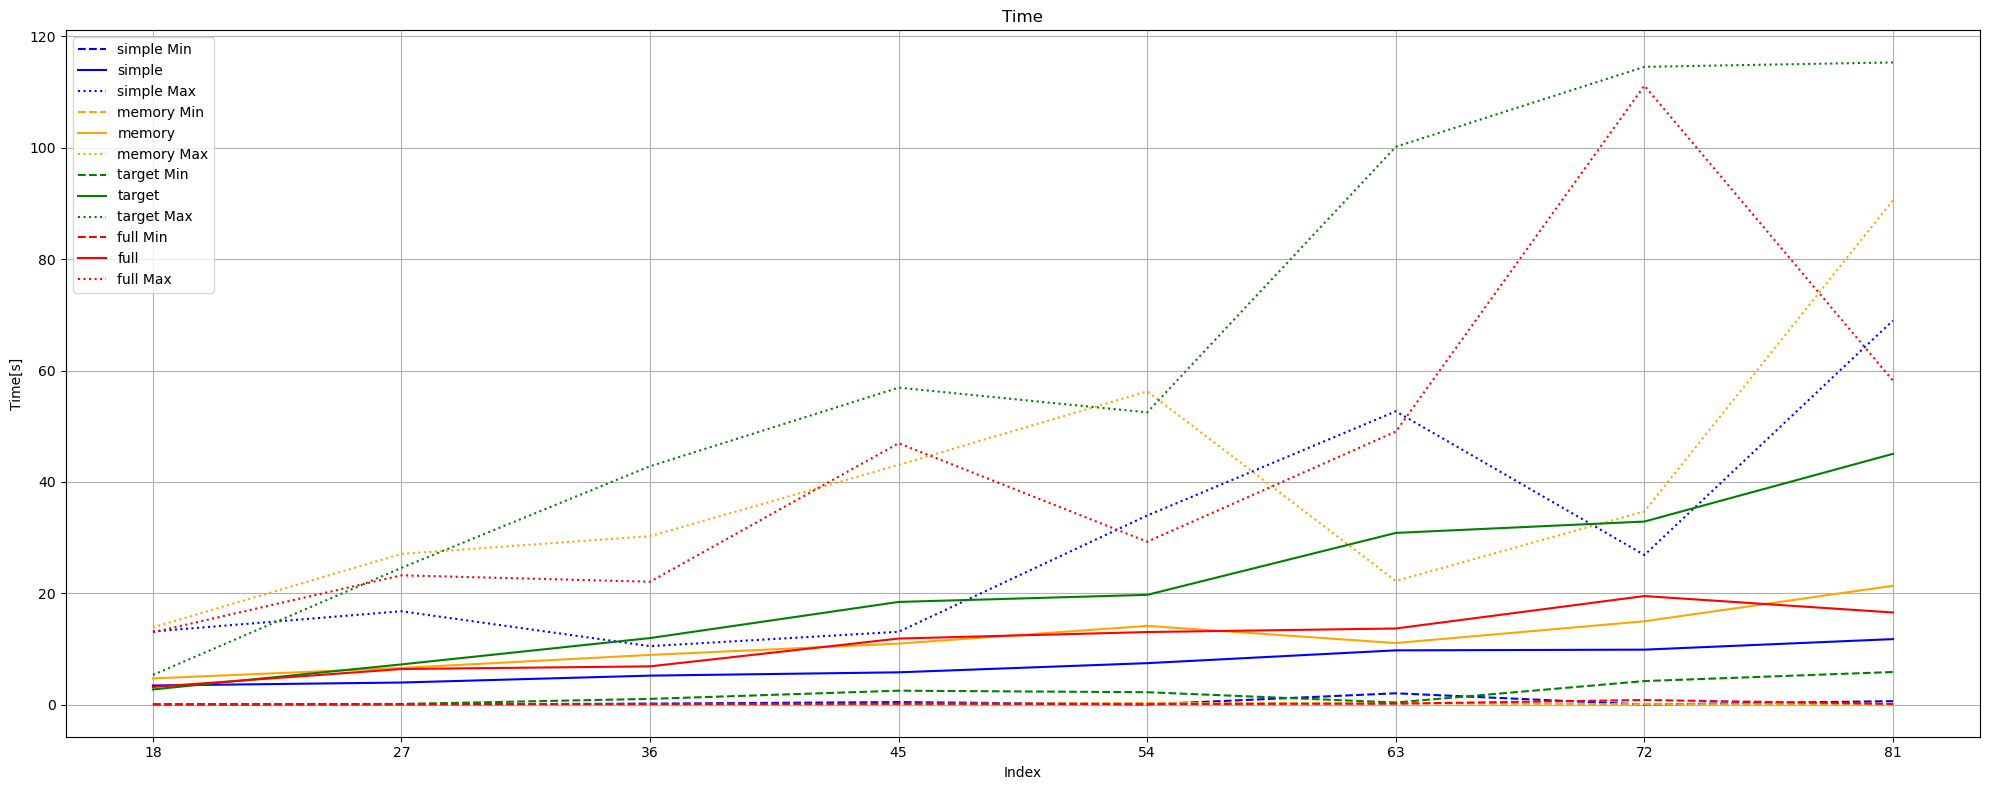

In [8]:
# Time data (min, mean, max)

fig, ax = plt.subplots(figsize=(20, 8))

for color,type in dqn_types:
    time_min = ([x[0][0][0] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for min value plot
    time_mean = ([x[0][0][1] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] ) 
    time_max = ([x[0][0][2] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for max value plot


    # Plot time data
    ax.plot(time_min[1],time_min[0], label=type + ' Min', color=color, linestyle='--') #uncoment for min value plot
    ax.plot(time_mean[1],time_mean[0], label=type, color=color, linestyle='-')
    ax.plot(time_max[1],time_max[0], label=type + ' Max', color=color, linestyle=':') #uncoment for max value plot


ax.set_xticks(time_mean[1])
ax.set_title('Time')
ax.set_xlabel('Index')
ax.set_ylabel('Time[s]')
ax.legend()

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations data


# Display the plot
plt.grid()
plt.tight_layout()
plt.show()


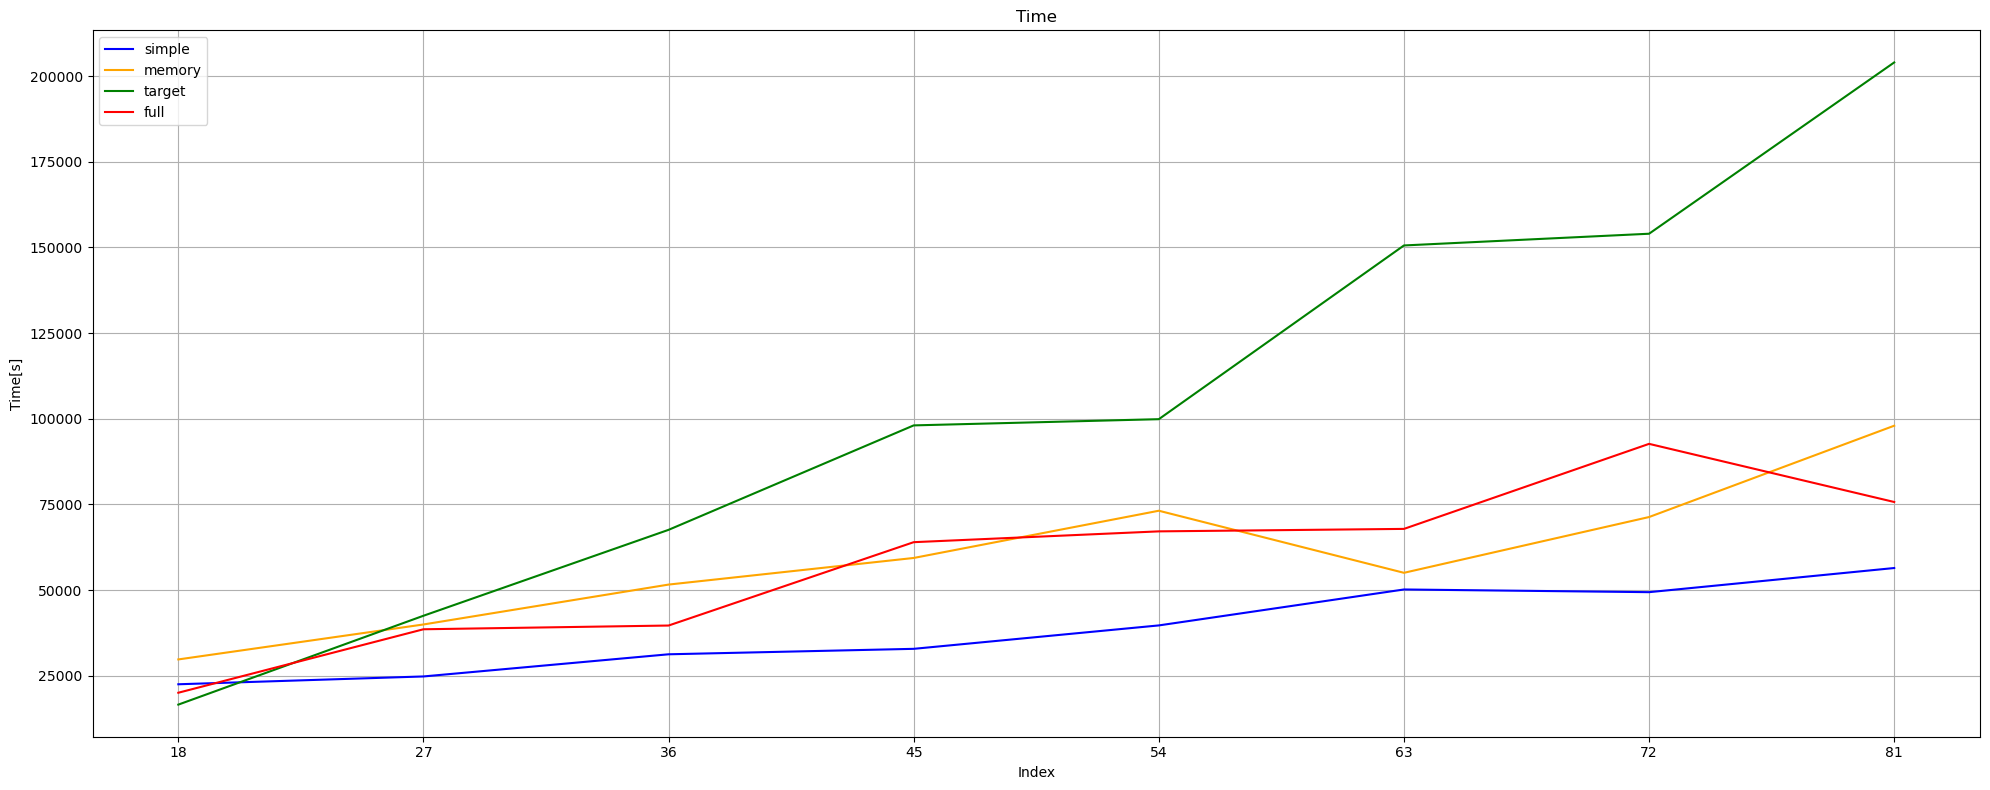

In [9]:
# Iterations data (min, mean, max)
fig, ax = plt.subplots(figsize=(20, 8))

for color,type in dqn_types:
    #time_min = ([x[0][1][0] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for min value plot
    iter_mean = ([x[0][1][1] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] ) 
    #time_max = ([x[0][1][2] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for max value plot


    # Plot time data
    #ax.plot(time_min[0], label='Time Min', color='blue', linestyle='--') #uncoment for min value plot
    ax.plot(iter_mean[1],iter_mean[0], label=type, color=color, linestyle='-')
    #ax.plot(time_max[0], label='Time Max', color='blue', linestyle=':') #uncoment for max value plot


# for i,label in enumerate(time_mean[1]):
#     ax.text(i, 0, label, fontsize=9, ha='right', va='bottom', color='blue')
ax.set_xticks(iter_mean[1])
ax.set_title('Time')
ax.set_xlabel('Index')
ax.set_ylabel('Time[s]')
ax.legend()

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations datastanów lub działania).
plt.grid()
plt.tight_layout()
plt.show()

# Histogram Danych 

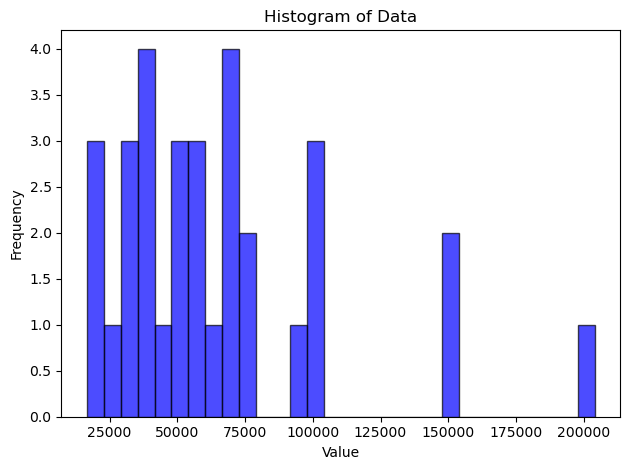

In [17]:
data =[]
for color,type in dqn_types:
    #time_min = ([x[0][1][0] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for min value plot
    # = ([x[0][1][1] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )
        data += [x[0][1][1] for x in ready_data_sorted_by_size[type]]

plt.hist(data, bins=30, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()